In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score)

In [73]:
# mass_no_country = pd.read_pickle('../data/mass_no_country.pickle')

In [3]:
mass_no_country = pd.read_csv('../data/03_mass_no_country.csv')

In [4]:
def evaluate_model(y_true, y_preds):

    f1 = f1_score(y_true, y_preds)
    
    precision = precision_score(y_true, y_preds)
    
    recall = recall_score(y_true, y_preds)

    # add accuracy

    return f1, precision, recall

In [5]:
def response_prediction_columns(model, df, features):
    
    ss = StandardScaler()
    
    X = features
    X_sc = ss.fit_transform(X)
    
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [6]:
def state_response_predictor(df, features, target, model):
    
    X = features 
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()

    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    model.fit(X_train_sc, y_train)
    
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    f1_score_train, precision_train, recall_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test = evaluate_model(y_test, y_preds_test)
    
    print(f'{target}- F1_score for {model} model, train set: {f1_score_train}')
    print(f'{target}- F1_score for {model} model, test set: {f1_score_test}')
    print(f'{target}- Precision for {model} model, train set: {precision_train}')
    print(f'{target}- Precision for {model} model, test set: {precision_test}')
    print(f'{target}- Recall for {model} model, train set: {recall_train}')
    print(f'{target}- Recall for {model} model, teset set: {recall_test}')
    
    predicted_column, probability_column = response_prediction_columns(model, df, features)
    
#     print(model)

#     # confusion_matrix 
#     cf_matrix = plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}, f'{target}'])
                                                                                              
    # confusion_matrix 
    print(confusion_matrix(y_test, y_preds_test))
    cf_matrix = plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])

    return predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix   

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, teset set: 0.0
[[2616    0]
 [ 420    0]]


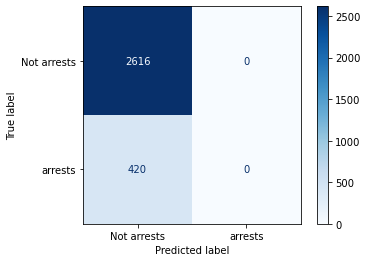

In [7]:
# DELETE LATER 

features_arr = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])

lr_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

mass_no_country['arrests_predicted'], mass_no_country['arrests_probability'], \
f1_score_train_arrests, f1_score_test_arrests, precision_train_arrests, precision_test_arrests, recall_train_arrests, recall_test_arrests, cf_matrix_arrests = \
state_response_predictor(mass_no_country, features_arr, 'arrests', lr_arr)

In [8]:
mass_no_country['arrests'].value_counts()

0    13036
1     2143
Name: arrests, dtype: int64

Creating two new columns that consolidate the three violent state responses -- `beatings, shootings, killings`.
+ `violent_response`: indicates whether or not a violdnt state response was used. (0 for no, 1 for yes)
+ `violent_count`: indicates number (0,1,2,3) of violent ressponses that were recorded. (I anticipate this will be used just to judge collinearity/dependence.)

_NB: Not yet dropping the original three columns._

In [4]:
# mass['violent_response'] = 0 
# # mass.loc[ (mass['beatings'] == 1 | mass['shootings'] == 1 | mass['killings'] == 1), 'violent_response' ] = 1
# mass.loc[mass['beatings'] == 1, 'violent_response'] = 1
# mass.loc[mass['shootings'] == 1, 'violent_response'] = 1
# mass.loc[mass['killings'] == 1, 'violent_response'] = 1

In [5]:
# mass['violent_count'] = mass['beatings'] + mass['shootings'] + mass['killings']

In [6]:
# checking whether the new column looks good 
# mass[['beatings', 'shootings','killings', 'violent_response', 'violent_count']]

In [7]:
# mass[ mass['violent_count'] > 1][['beatings', 'shootings','killings', 'violent_response']].count()

_Saving and pickling `mass` DataFrame that now has `violent_response` and `violent_count` columns. 

_**I'm going to use the `mass_no_country` DataFrame to run this gridsearch since it has been shown to perform better and will save time (I hope!)**_

In [8]:
# mass_no_country = pd.read_pickle('../data/mass_no_country.pickle')

In [11]:
# mass_no_country.info()

In [54]:
# plt.scatter(mass_no_country['protestnumber'], mass_no_country['violent_response'])

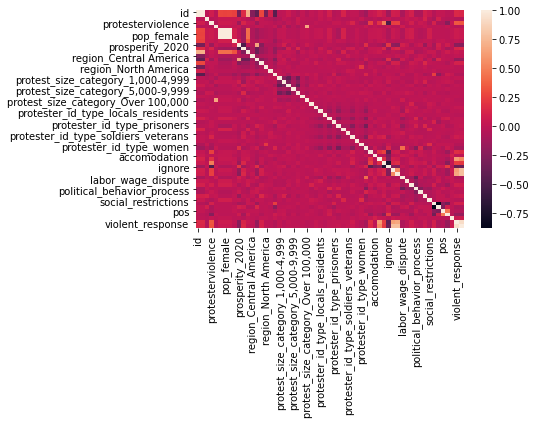

In [58]:
sns.heatmap(mass_no_country.corr());

In [69]:
from scipy import stats

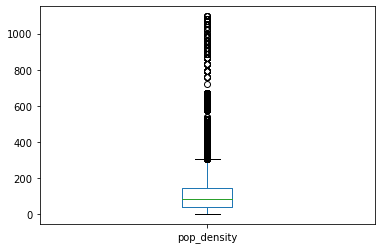

In [73]:
mass_no_country = mass_no_country[(np.abs(stats.zscore(mass_no_country['pop_density'])) < 3)]
mass_no_country['pop_density'].plot(kind='box');

In [71]:
mass_no_country.shape

(15179, 71)

In [72]:
f.shape

(14944, 71)

In [75]:
# plt.scatter(mass_no_country['protesterviolence'], mass_no_country['violent_response'])

In [67]:
# sorted(list(mass_no_country['pop_total']))

In [16]:
# NEW CODE 

results = {
    'target':[],
    'best_cv_scores' : [],
    'best_params' : [],
    'train_f1_scores' : [],
    'test_f1_scores' : [],
    'train_precision_scores' : [], 
    'test_precision_scores' : [],
    'train_recall_scores' : [],
    'test_recall_scores' : []
}

targets = ['arrests','accomodation','crowddispersal','ignore', 'violent_response']   
# grids =[]


for target in targets:    
    
    features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])
    
    X = features
    y = mass_no_country[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
    
    ss = StandardScaler()
    
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    logreg = LogisticRegression()
    
    params = {
        'penalty' : ['l1','l2'], 
        'C' : [.01, 1, 10],
        'solver' : ['liblinear', 'saga', 'lfgbs'],
        'max_iter' : [100, 1000]
    }
    
    gs = GridSearchCV(logreg, param_grid=params, cv=10, verbose=2)
    
#     grids.append(gs)
    
#     for grid in grids: 
        
    # fit grids
    gs.fit(X_train_sc, y_train)
    
    # appending name of target to identify results 
    results['target'].append(target)

    # append important grid results
    results['best_params'].append(gs.best_params_)
    results['best_cv_scores'].append(gs.best_score_)

    # make predictions 
    train_preds = gs.predict(X_train_sc)
    test_preds = gs.predict(X_test_sc)

    # various classification metrics
    # f1 scores
    results['train_f1_scores'].append(f1_score(y_train, train_preds))
    results['test_f1_scores'].append(f1_score(y_test, test_preds))

    # precision scores 
    results['train_precision_scores'].append(precision_score(y_train, train_preds))
    results['test_precision_scores'].append(precision_score(y_test, test_preds))

    # recall scores
    results['train_recall_scores'].append(recall_score(y_train, train_preds))
    results['test_recall_scores'].append(recall_score(y_test, test_preds))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   1.4s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   1.1s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   3.7s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   3.6s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.7s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.7s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   1.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   4.0s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   4.9s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   5.0s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   5.4s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   4.4s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   4.6s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   5.1s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   4.7s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   4.8s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   5.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   5.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   2.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, so

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.1s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   1.2s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

In [65]:
list(mass_no_country['arrests'])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [61]:
features_arr = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])

lr_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, teset set: 0.0
[[3942    0]
 [ 612    0]]


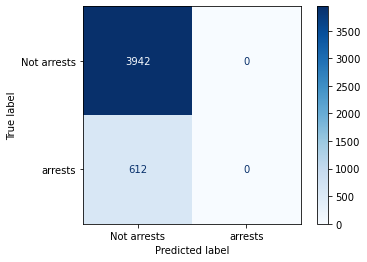

In [62]:
# DELETE LATER 

features_arr = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])

lr_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

mass_no_country['arrests_predicted'], mass_no_country['arrests_probability'], \
f1_score_train_arrests, f1_score_test_arrests, precision_train_arrests, precision_test_arrests, recall_train_arrests, recall_test_arrests, cf_matrix_arrests = \
state_response_predictor(mass_no_country, features_arr, 'arrests', lr_arr)

In [34]:
mass_no_country.shape

(15179, 73)

In [33]:
mass_no_country['arrests'].value_counts(normalize=True)

0    0.858818
1    0.141182
Name: arrests, dtype: float64

In [19]:
pd.options.display.max_colwidth = 150

In [20]:
results_df = pd.DataFrame(results)
results_df

,target,best_cv_scores,best_params,train_f1_scores,test_f1_scores,train_precision_scores,test_precision_scores,train_recall_scores,test_recall_scores
0,arrests,0.858108,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,accomodation,0.899037,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}",0.003252,0.000000,0.500000,0.000000,0.001631,0.000000
2,crowddispersal,0.789179,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.636713,0.626690,0.696206,0.701316,0.586586,0.566419
3,ignore,0.734828,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.785948,0.790331,0.700785,0.700839,0.894673,0.906024
4,violent_response,0.876060,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}",0.167691,0.225352,0.595238,0.676056,0.097593,0.135211


In [18]:
results

{'target': ['arrests',
  'accomodation',
  'crowddispersal',
  'ignore',
  'violent_response'],
 'best_cv_scores': [0.8581076738462791,
  0.8990366167009037,
  0.7891787174324242,
  0.7348275604911153,
  0.8760601623039845],
 'best_params': [{'C': 0.01,
   'max_iter': 100,
   'penalty': 'l1',
   'solver': 'liblinear'},
  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'},
  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'},
  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'},
  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}],
 'train_f1_scores': [0.0,
  0.0032520325203252032,
  0.636712640409498,
  0.7859476034931006,
  0.16769144773616546],
 'test_f1_scores': [0.0,
  0.0,
  0.6266901822457378,
  0.79033105622701,
  0.2253521126760563],
 'train_precision_scores': [0.0,
  0.5,
  0.6962064676616916,
  0.7007845934379457,
  0.5952380952380952],
 'test_precision_scores': [0.0,
  0.0,
  0.7013157894736842,
  0.700838769804

In [2]:
# results = {
#     'best_cv_scores' : [],
#     'best_params' : [],
#     'train_f1_scores' : [],
#     'test_f1_scores' : [],
#     'train_precision_scores' : [], 
#     'test_precision_scores' : [],
#     'train_recall_scores' : [],
#     'test_recall_scores' : []
# }

# for grid in grids: 
    
#     # fit grids
#     grid.fit(X_train_sc, y_train)
    
#     # append important grid results
#     results['best_params'].append(grid.best_params_)
#     results['best_cv_scores'].append(grid.best_score_)
    
#     # make predictions 
#     train_preds = grid.predict(X_train_sc)
#     test_preds = grid.predict(X_test_sc)
    
#     # various classification metrics
#     # f1 scores
#     results['train_f1_scores'].append(f1_score(y_train, train_preds))
#     results['test_f1_scores'].append(f1_score(y_test, test_preds))
    
#     # precision scores 
#     results['train_precision_scores'].append(precision_score(y_train, train_preds))
#     results['test_precision_scores'].append(precision_score(y_test, test_preds))
    
#     # recall scores
#     results['train_recall_scores'].append(recall_score(y_train, train_preds))
#     results['test_recall_scores'].append(recall_score(y_test, test_preds))
    
# results_df = pd.DataFrame(results)
# results_df

In [191]:
# mass.to_csv('../data/03_mass_violent_response.csv', index=False)

In [193]:
# mass.to_pickle('../data/03_mass_violent_response.pickle')

In [195]:
features = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
            'violent_response', 'violent_count'])

LogisticRegression_1 = LogisticRegression(solver='lbfgs', max_iter=1000)

In [196]:
# (mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
#            'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
#            'end_date', 'target', 'arrests', 'accomodation', 'beatings',
#            'crowddispersal', 'ignore', 'killings', 'shootings'])).columns

**Adding `predicted` and `probability` columns for each each response to the `mass` DF using `state_response_predictor` function.** 

Responses: `'arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings'`

In [197]:
mass['arrests_predicted'], mass['arrests_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'arrests', LogisticRegression_1)

In [198]:
mass['accomodation_predicted'], mass['accomodation_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'accomodation', LogisticRegression_1)

In [199]:
# looking at where accomodation is '1' and it was also correctly predicted 

mass[ (mass['accomodation'] == mass['accomodation_predicted']) & mass['accomodation']==1 ][['accomodation', 'accomodation_predicted', 'accomodation_probability']]

,accomodation,accomodation_predicted,accomodation_probability
451,1,1,0.921425
1438,1,1,0.609061
1469,1,1,0.550764
1679,1,1,0.596815
2061,1,1,0.540708
...,...,...,...
14736,1,1,0.609921
14737,1,1,0.840545
15133,1,1,0.524657
15149,1,1,0.531713


In [200]:
mass['beatings_predicted'], mass['beatings_probability'], f1_score_train, \
f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'beatings', LogisticRegression_1)

In [201]:
mass['crowddispersal_predicted'], mass['crowddispersal_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'crowddispersal', LogisticRegression_1)

In [202]:
mass['ignore_predicted'], mass['ignore_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'ignore', LogisticRegression_1)

In [203]:
mass['killings_predicted'], mass['killings_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'killings', LogisticRegression_1)

In [204]:
mass['shootings_predicted'], mass['shootings_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'shootings', LogisticRegression_1)

In [205]:
predictions_df = mass[['id','arrests', 'arrests_predicted', 'arrests_probability', 'accomodation', 'accomodation_predicted', 'accomodation_probability', 
      'beatings', 'beatings_predicted', 'beatings_probability', 'crowddispersal', 'crowddispersal_predicted', 'crowddispersal_probability', 
      'ignore', 'ignore_predicted', 'ignore_probability', 'killings', 'killings_predicted', 'killings_probability',
      'killings', 'killings_predicted', 'killings_probability']].copy()

In [206]:
predictions_df.head()

,id,arrests,arrests_predicted,arrests_probability,accomodation,accomodation_predicted,accomodation_probability,beatings,beatings_predicted,beatings_probability,...,crowddispersal_probability,ignore,ignore_predicted,ignore_probability,killings,killings_predicted,killings_probability,killings,killings_predicted,killings_probability
0,201990001,0,0,0.148069,0,0,0.125990,0,0,0.000192,...,0.084188,1,1,0.706858,0,0,0.004661,0,0,0.004661
1,201990002,0,0,0.132347,0,0,0.083107,0,0,0.000267,...,0.064624,1,1,0.749024,0,0,0.002015,0,0,0.002015
2,201990003,0,0,0.082134,0,0,0.041444,0,0,0.000125,...,0.042882,1,1,0.807295,0,0,0.000728,0,0,0.000728
3,201990004,0,1,0.585644,1,0,0.295309,0,0,0.000685,...,0.526179,0,0,0.066220,0,0,0.123478,0,0,0.123478
4,201990005,1,0,0.370170,1,0,0.090058,0,0,0.000518,...,0.376911,0,0,0.166469,0,0,0.020468,0,0,0.020468


In [207]:
# predictions_df.to_csv('../data/04_predictions_only.csv', index=False)

Adding `predicted` and `probability` columns for a violent response of any type (beatings/shootings/killigs). 

In [208]:
mass['violence_predicted'], mass['violence_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass, features, 'violent_response', LogisticRegression_1)

In [215]:
model_performance_dict = {
    'target':[],
    'majority_class':[],
    'majority_percent':[],
#     'model':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[] 
}

 
targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings', 'violent_response']    
    
for target in targets:
    
    predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = state_response_predictor(
                                                                                                                                mass, 
                                                                                                                                features, 
                                                                                                                                target, 
                                                                                                                                LogisticRegression_1)
    
    model_performance_dict['target'].append(target)
    model_performance_dict['majority_class'].append(mass[target].value_counts(normalize=True).idxmax())
    model_performance_dict['majority_percent'].append(max(mass[target].value_counts(normalize=True)))
#     model_performance_dict['model'].append(model)
    model_performance_dict['f1_score_train'].append(f1_score_train)
    model_performance_dict['f1_score_test'].append(f1_score_test)
    model_performance_dict['precision_train'].append(precision_train)
    model_performance_dict['precision_test'].append(precision_test)
    model_performance_dict['recall_train'].append(recall_train)
    model_performance_dict['recall_test'].append(recall_test)
    
print(model_performance_dict)
    
model_performance_df = pd.DataFrame(model_performance_dict)
model_performance_df.round(4)

{'target': ['arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'], 'majority_class': [0, 0, 0, 0, 1, 0, 0, 0], 'majority_percent': [0.8588181039594176, 0.8997957704723631, 0.9472956057711311, 0.6865406153238026, 0.5434481849924238, 0.9457144739442651, 0.9386652612161539, 0.8753541076487252], 'f1_score_train': [0.24430264357338197, 0.09939759036144577, 0.17173051519154559, 0.6446232626188734, 0.7954094644375178, 0.24191616766467064, 0.24093816631130063, 0.39802336028751123], 'f1_score_test': [0.2722117202268431, 0.06984126984126984, 0.15568862275449102, 0.624173180998196, 0.7837535014005603, 0.1958762886597938, 0.2, 0.35976789168278533], 'precision_train': [0.5690021231422505, 0.6470588235294118, 0.65, 0.7299536116633533, 0.745848279527036, 0.6121212121212121, 0.5947368421052631, 0.6429608127721336], 'precision_test': [0.6605504587155964, 0.55, 0.5416666666666666, 0.7188365650969529, 0.7324607329842932, 0.475, 0.48936170212765956

,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.8588,0.2443,0.2722,0.5690,0.6606,0.1555,0.1714
1,accomodation,0,0.8998,0.0994,0.0698,0.6471,0.5500,0.0538,0.0373
2,beatings,0,0.9473,0.1717,0.1557,0.6500,0.5417,0.0989,0.0909
3,crowddispersal,0,0.6865,0.6446,0.6242,0.7300,0.7188,0.5772,0.5515
4,ignore,1,0.5434,0.7954,0.7838,0.7458,0.7325,0.8520,0.8428
5,killings,0,0.9457,0.2419,0.1959,0.6121,0.4750,0.1507,0.1234
6,shootings,0,0.9387,0.2409,0.2000,0.5947,0.4894,0.1511,0.1257
7,violent_response,0,0.8754,0.3980,0.3598,0.6430,0.5741,0.2882,0.2620


,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.8588,0.2443,0.2722,0.5690,0.6606,0.1555,0.1714
1,accomodation,0,0.8998,0.0994,0.0698,0.6471,0.5500,0.0538,0.0373
2,beatings,0,0.9473,0.1717,0.1557,0.6500,0.5417,0.0989,0.0909
3,crowddispersal,0,0.6865,0.6446,0.6242,0.7300,0.7188,0.5772,0.5515
4,ignore,1,0.5434,0.7954,0.7838,0.7458,0.7325,0.8520,0.8428
5,killings,0,0.9457,0.2419,0.1959,0.6121,0.4750,0.1507,0.1234
6,shootings,0,0.9387,0.2409,0.2000,0.5947,0.4894,0.1511,0.1257
7,violent_response,0,0.8754,0.3980,0.3598,0.6430,0.5741,0.2882,0.2620


In [211]:
mass['arrests'].value_counts(normalize=True)

0    0.858818
1    0.141182
Name: arrests, dtype: float64

In [212]:
mass['arrests'].value_counts(normalize=True).idxmax()

0

In [213]:
max(mass['arrests'].value_counts(normalize=True))

0.8588181039594176

In [214]:
# mass.info(verbose=True)

_Saving `mass` DataFrame again now that it has the viole